## Vorlesung 1: Erste Datensichtung, Aufbereitung & Exploration

*Veranschaulichung der Daten, Variablen verstehen, erste Statistiken & Visualisierungen*

In [20]:
%pip install missingno
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [21]:
# CSV-Datei laden und die ersten Zeilen anzeigen

df = pd.read_csv("OECD.WISE.WDP,DSD_HSL@DF_HSL_CWB,+all.csv")
df.head()


,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,MEASURE,Measure,UNIT_MEASURE,Unit of measure,...,OBS_VALUE,Observation value,OBS_STATUS,Observation status,UNIT_MULT,Unit multiplier,DECIMALS,Decimals,BASE_PER,Base period
0,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1),Current well-being,I,AUS,Australia,10_2,Feeling safe at night,PT_POP_Y_GE15_SUB,Percentage of population aged 15 years or over...,...,68.428571,NaN,A,Normal value,0,Units,2,Two,NaN,NaN
1,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1),Current well-being,I,AUS,Australia,10_2,Feeling safe at night,PT_POP_Y_GE15_SUB,Percentage of population aged 15 years or over...,...,68.428571,NaN,A,Normal value,0,Units,2,Two,NaN,NaN
2,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1),Current well-being,I,AUS,Australia,10_2,Feeling safe at night,PT_POP_Y_GE15_SUB,Percentage of population aged 15 years or over...,...,68.428571,NaN,A,Normal value,0,Units,2,Two,NaN,NaN
3,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1),Current well-being,I,AUS,Australia,10_2,Feeling safe at night,PT_POP_Y_GE15_SUB,Percentage of population aged 15 years or over...,...,68.428571,NaN,A,Normal value,0,Units,2,Two,NaN,NaN
4,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1),Current well-being,I,AUS,Australia,10_2,Feeling safe at night,PT_POP_Y_GE15_SUB,Percentage of population aged 15 years or over...,...,68.428571,NaN,A,Normal value,0,Units,2,Two,NaN,NaN


In [22]:
# Infos zum Datensatz anzeigen und erste Übersicht über Zahlenwerte

df.info()
df.describe()
df.columns



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108088 entries, 0 to 108087
Data columns (total 30 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   STRUCTURE           108088 non-null  object 
 1   STRUCTURE_ID        108088 non-null  object 
 2   STRUCTURE_NAME      108088 non-null  object 
 3   ACTION              108088 non-null  object 
 4   REF_AREA            108088 non-null  object 
 5   Reference area      108088 non-null  object 
 6   MEASURE             108088 non-null  object 
 7   Measure             108088 non-null  object 
 8   UNIT_MEASURE        108088 non-null  object 
 9   Unit of measure     108088 non-null  object 
 10  AGE                 108088 non-null  object 
 11  Age                 108088 non-null  object 
 12  SEX                 108088 non-null  object 
 13  Sex                 108088 non-null  object 
 14  EDUCATION_LEV       108088 non-null  object 
 15  Education level     108088 non-nul

Index(['STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'ACTION', 'REF_AREA',
       'Reference area', 'MEASURE', 'Measure', 'UNIT_MEASURE',
       'Unit of measure', 'AGE', 'Age', 'SEX', 'Sex', 'EDUCATION_LEV',
       'Education level', 'DOMAIN', 'Domain', 'TIME_PERIOD', 'Time period',
       'OBS_VALUE', 'Observation value', 'OBS_STATUS', 'Observation status',
       'UNIT_MULT', 'Unit multiplier', 'DECIMALS', 'Decimals', 'BASE_PER',
       'Base period'],
      dtype='object')

In [23]:
# Entfernung unnötiger Spalten, die beim CSV-Export entstanden sind (wie z.B. die unnamed Spalten)

df = df.drop(columns=[c for c in df.columns if "Unnamed" in c])
df.head()


,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,MEASURE,Measure,UNIT_MEASURE,Unit of measure,...,OBS_VALUE,Observation value,OBS_STATUS,Observation status,UNIT_MULT,Unit multiplier,DECIMALS,Decimals,BASE_PER,Base period
0,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1),Current well-being,I,AUS,Australia,10_2,Feeling safe at night,PT_POP_Y_GE15_SUB,Percentage of population aged 15 years or over...,...,68.428571,NaN,A,Normal value,0,Units,2,Two,NaN,NaN
1,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1),Current well-being,I,AUS,Australia,10_2,Feeling safe at night,PT_POP_Y_GE15_SUB,Percentage of population aged 15 years or over...,...,68.428571,NaN,A,Normal value,0,Units,2,Two,NaN,NaN
2,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1),Current well-being,I,AUS,Australia,10_2,Feeling safe at night,PT_POP_Y_GE15_SUB,Percentage of population aged 15 years or over...,...,68.428571,NaN,A,Normal value,0,Units,2,Two,NaN,NaN
3,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1),Current well-being,I,AUS,Australia,10_2,Feeling safe at night,PT_POP_Y_GE15_SUB,Percentage of population aged 15 years or over...,...,68.428571,NaN,A,Normal value,0,Units,2,Two,NaN,NaN
4,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1),Current well-being,I,AUS,Australia,10_2,Feeling safe at night,PT_POP_Y_GE15_SUB,Percentage of population aged 15 years or over...,...,68.428571,NaN,A,Normal value,0,Units,2,Two,NaN,NaN


In [24]:
# Wichtige Spalten umbenennen, damit sie leichter zu verstehen sind.

df = df.rename(columns={
    "REF_AREA":"country",
    "MEASURE":"measure",
    "UNIT_MEASURE":"unit",
    "TIME_PERIOD":"year",
    "OBS_VALUE":"value"
})
df.head()


,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,country,Reference area,measure,Measure,unit,Unit of measure,...,value,Observation value,OBS_STATUS,Observation status,UNIT_MULT,Unit multiplier,DECIMALS,Decimals,BASE_PER,Base period
0,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1),Current well-being,I,AUS,Australia,10_2,Feeling safe at night,PT_POP_Y_GE15_SUB,Percentage of population aged 15 years or over...,...,68.428571,NaN,A,Normal value,0,Units,2,Two,NaN,NaN
1,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1),Current well-being,I,AUS,Australia,10_2,Feeling safe at night,PT_POP_Y_GE15_SUB,Percentage of population aged 15 years or over...,...,68.428571,NaN,A,Normal value,0,Units,2,Two,NaN,NaN
2,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1),Current well-being,I,AUS,Australia,10_2,Feeling safe at night,PT_POP_Y_GE15_SUB,Percentage of population aged 15 years or over...,...,68.428571,NaN,A,Normal value,0,Units,2,Two,NaN,NaN
3,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1),Current well-being,I,AUS,Australia,10_2,Feeling safe at night,PT_POP_Y_GE15_SUB,Percentage of population aged 15 years or over...,...,68.428571,NaN,A,Normal value,0,Units,2,Two,NaN,NaN
4,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1),Current well-being,I,AUS,Australia,10_2,Feeling safe at night,PT_POP_Y_GE15_SUB,Percentage of population aged 15 years or over...,...,68.428571,NaN,A,Normal value,0,Units,2,Two,NaN,NaN


In [25]:
# Spalten, die Zahlen sind, in Zahlen umwandeln.

df["year"] = pd.to_numeric(df["year"], errors="coerce")
df["value"] = pd.to_numeric(df["value"], errors="coerce")

for col in ["country","measure","unit"]:
    if col in df.columns:
        df[col] = df[col].astype("category")

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108088 entries, 0 to 108087
Data columns (total 30 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   STRUCTURE           108088 non-null  object  
 1   STRUCTURE_ID        108088 non-null  object  
 2   STRUCTURE_NAME      108088 non-null  object  
 3   ACTION              108088 non-null  object  
 4   country             108088 non-null  category
 5   Reference area      108088 non-null  object  
 6   measure             108088 non-null  category
 7   Measure             108088 non-null  object  
 8   unit                108088 non-null  category
 9   Unit of measure     108088 non-null  object  
 10  AGE                 108088 non-null  object  
 11  Age                 108088 non-null  object  
 12  SEX                 108088 non-null  object  
 13  Sex                 108088 non-null  object  
 14  EDUCATION_LEV       108088 non-null  object  
 15  Education level  

In [26]:
# Zeigen wo Zahlen fehlen

df.isna().sum()


STRUCTURE                  0
STRUCTURE_ID               0
STRUCTURE_NAME             0
ACTION                     0
country                    0
Reference area             0
measure                    0
Measure                    0
unit                       0
Unit of measure            0
AGE                        0
Age                        0
SEX                        0
Sex                        0
EDUCATION_LEV              0
Education level            0
DOMAIN                     0
Domain                     0
year                       0
Time period           108088
value                      0
Observation value     108088
OBS_STATUS                 0
Observation status         0
UNIT_MULT                  0
Unit multiplier            0
DECIMALS                   0
Decimals                   0
BASE_PER              106514
Base period           108088
dtype: int64

<Axes: >

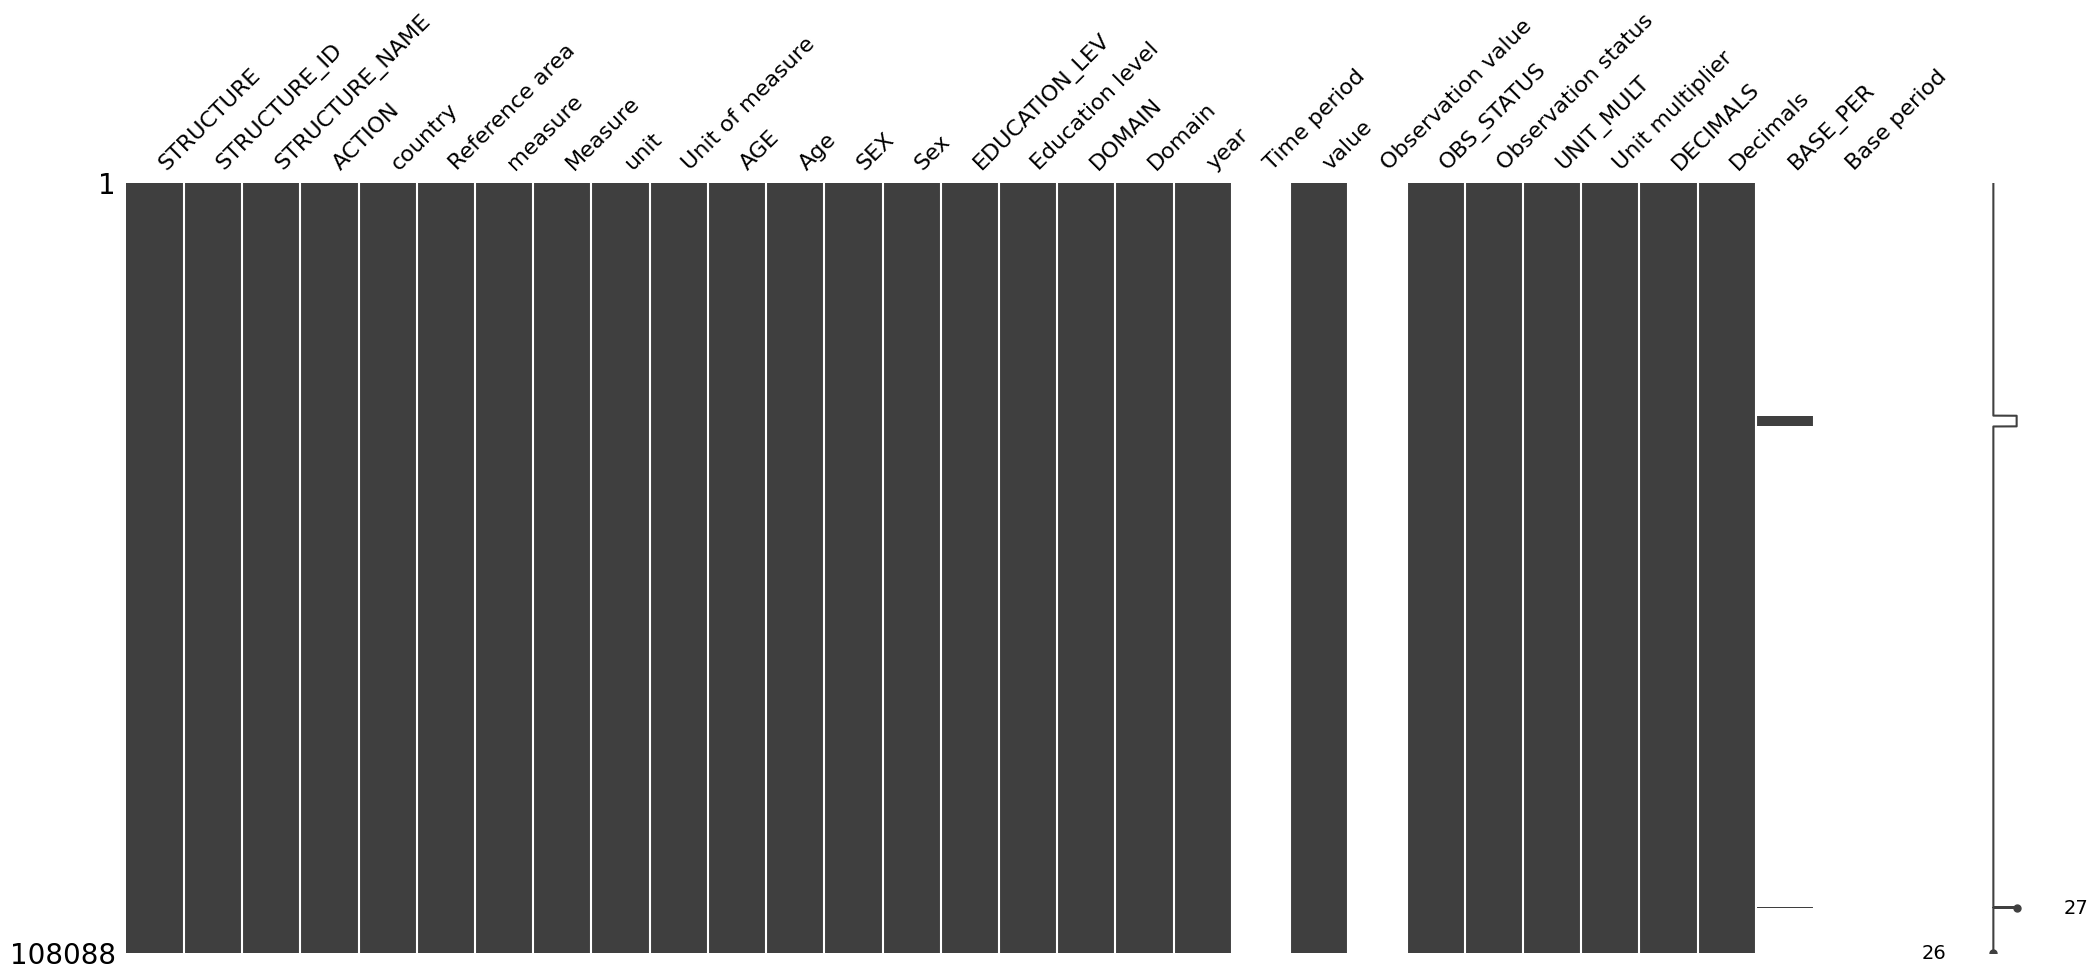

In [27]:
#Missing Data Matrix

import missingno as msno
msno.matrix(df)

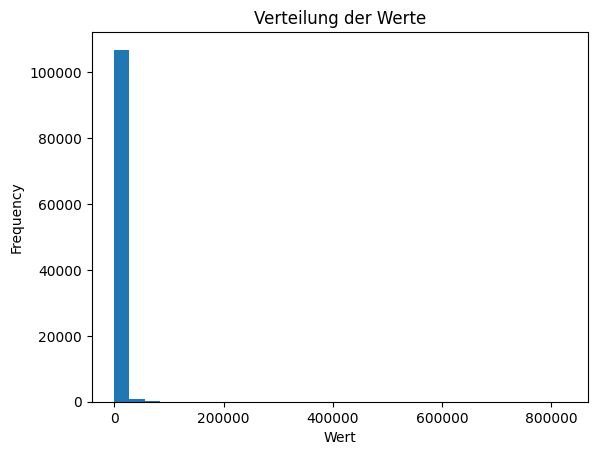

In [28]:
# Einfaches Histogramm

df["value"].plot(kind="hist", bins=30)
plt.title("Verteilung der Werte")
plt.xlabel("Wert")
plt.show()


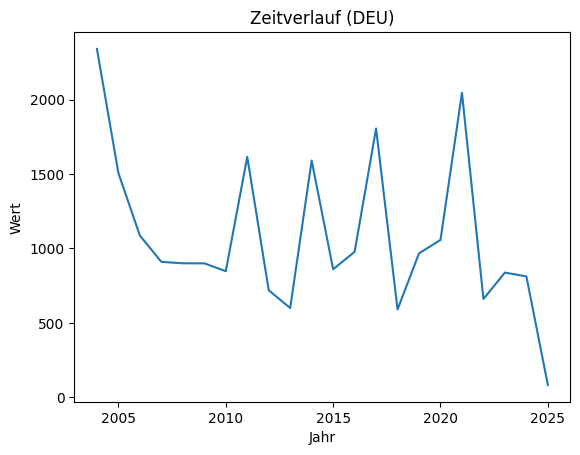

In [29]:
# Einfacher Zeitverlauf für ein Land (Beispiel hier: Deutschland)

df[df["country"] == "DEU"].groupby("year")["value"].mean().plot()
plt.title("Zeitverlauf (DEU)")
plt.xlabel("Jahr")
plt.ylabel("Wert")
plt.show()


**HYPOTHESE: Veränderung des durchschnittlichen Well-Being-Indikators im Zeitverlauf je Land**

H_0 (Nullhypothese): Der durchschnittliche Well-Being-Wert hat sich über die beobachteten Jahre nicht signifikant zwischen den Ländern verändert.

H_1 (Alternativhypothese): Es gibt signifikante Unterschiede im zeitlichen Verlauf des Well-Being-Wertes zwischen den Ländern. Einige Länder verbessern sich deutlich, andere verschlechtern sich.

/var/folders/dz/832hrd_95rn7bh82j0wx55ym0000gn/T/ipykernel_41688/483282802.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_country_mean = df.groupby(["country", "year"])["value"].mean().reset_index()
/var/folders/dz/832hrd_95rn7bh82j0wx55ym0000gn/T/ipykernel_41688/483282802.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_country_mean.groupby("country")["value"]


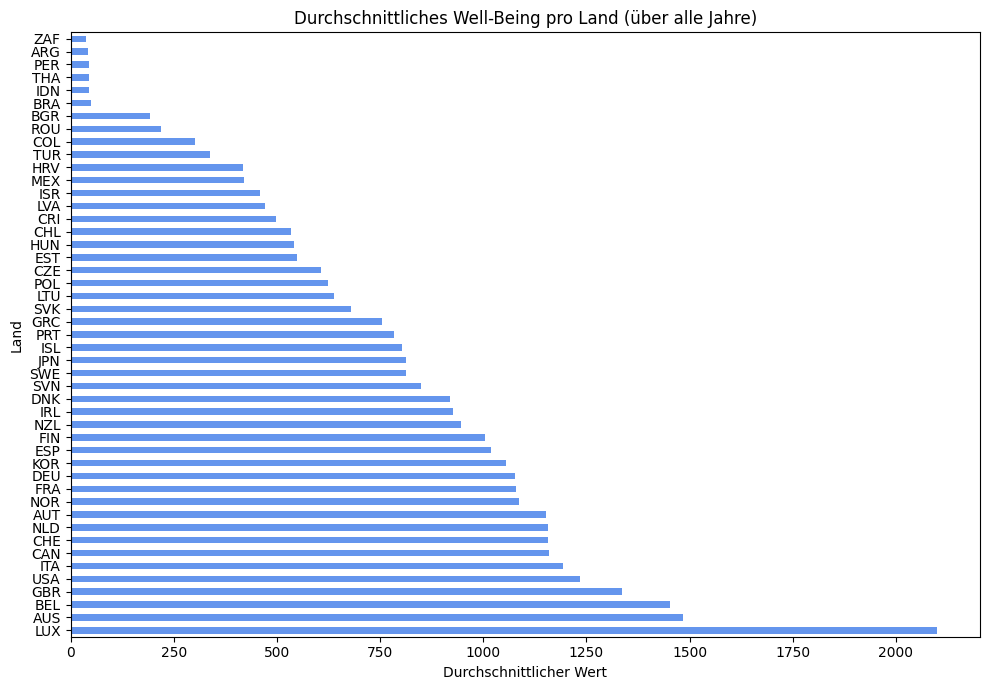

country
LUX    2098.681837
AUS    1484.985200
BEL    1452.117962
GBR    1334.994268
USA    1234.755916
ITA    1192.270622
CAN    1160.015348
CHE    1156.839052
NLD    1156.452591
AUT    1151.109024
Name: value, dtype: float64
country
TUR    338.188431
COL    300.685324
ROU    219.675503
BGR    192.271714
BRA     49.035110
IDN     45.558778
THA     45.144051
PER     44.800851
ARG     41.870246
ZAF     38.080411
Name: value, dtype: float64


In [30]:
#Durchschnittliches Wohlbefinden pro Land
df_country_mean = df.groupby(["country", "year"])["value"].mean().reset_index()

avg_wellbeing = (
    df_country_mean.groupby("country")["value"]
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10,7))
avg_wellbeing.plot(kind="barh", color="cornflowerblue")
plt.title("Durchschnittliches Well-Being pro Land (über alle Jahre)")
plt.xlabel("Durchschnittlicher Wert")
plt.ylabel("Land")
plt.tight_layout()
plt.show()

print(avg_wellbeing.head(10))
print(avg_wellbeing.tail(10))


/var/folders/dz/832hrd_95rn7bh82j0wx55ym0000gn/T/ipykernel_41688/300966200.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_country_mean = df.groupby(["country", "year"])["value"].mean().reset_index()
/var/folders/dz/832hrd_95rn7bh82j0wx55ym0000gn/T/ipykernel_41688/300966200.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_country_mean.groupby("country")["value"]


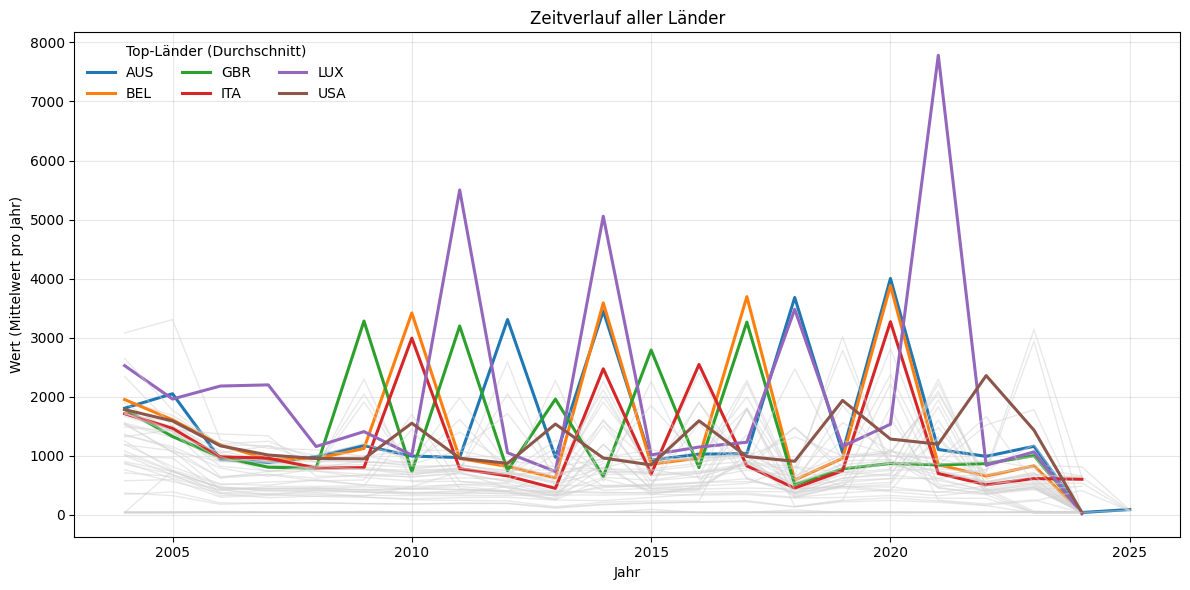

In [31]:
# Mittelwerte pro Land und Jahr berechnen
df_country_mean = df.groupby(["country", "year"])["value"].mean().reset_index()

avg_wellbeing = (
    df_country_mean.groupby("country")["value"]
    .mean()
    .sort_values(ascending=False)
)

top_k = 6  # z.B. die 6 besten Länder in deiner Liste
top_countries = avg_wellbeing.head(top_k).index.tolist()


# Linienplot für alle Länder
plt.figure(figsize=(12,6))
for land in df_country_mean["country"].unique():
    subset = df_country_mean[df_country_mean["country"] == land].sort_values("year")
    if land in top_countries:
        # hervorgehoben, mit Label für die Legende
        plt.plot(subset["year"], subset["value"], linewidth=2.2, label=land)
    else:
        # unaufdringlich in grau, ohne Label
        plt.plot(subset["year"], subset["value"], color="lightgray", alpha=0.5, linewidth=1)

plt.title("Zeitverlauf aller Länder")
plt.xlabel("Jahr")
plt.ylabel("Wert (Mittelwert pro Jahr)")
plt.grid(True, alpha=0.3)
plt.legend(title="Top-Länder (Durchschnitt)", ncol=3, frameon=False, loc="upper left")
plt.tight_layout()
plt.show()

**Interpretation der Ergebnisse**
**Hohe durchschnittliche Niveaus**

Luxemburg (LUX)
- ~2200 -> mit großem Abstand höchster Durchschnitt im gesamten Datensatz
- Im Zeitverlauf zeigt die Kurve massive Ausschläge nach oben (z. B. Spitzen ~5000-8000) und dann Abfall -> nicht vollkommen glatt, aber im Vergleich zu anderen Ländern dominiert dieser Wert dauerhaft das Feld
	-> spricht dafür, dass die Messung in einigen Jahren von besonders hohen Einzelindikatoren geprägt war, möglicherweise durch ökonomische Faktoren wie starkes Einkommenswachstum, Steueraufkommen oder Pro-Kopf-Vermögen


Australien (AUS), Belgien (BEL), Großbritannien (GBR) und USA
- obere Gruppe stabiler Wohlstandsnationen
- durchschnittliche Werte zwischen 1290 und 1550 => konsistent hohes Wohlbefinden
- moderate Schwankungen, aber keine extremen Ausschläge -> relativ konstante Entwicklung und gute Datenabdeckung über die Jahre

Niederlande (NLD), Schweiz (CHE), Italien (ITA), Österreich (AUT) und Kanada (CAN)
- Länder im oberen Mittelfeld
- vergleichsweise stabile Entwicklungen ohne extreme Ausschläge
- Besonders die Schweiz und die Niederlande weisen eine gleichmäßige Entwicklung mit geringer Varianz auf => hohe Datenqualität und gesellschaftliche Stabilität
- Italien und Österreich zeigen leichte Schwankungen, bleiben aber ebenfalls auf konstant hohem Niveau
- insgesamt: Wohlbefinden dauerhaft überdurchschnittlich

Länder mit niedrigem Wohlbefinden
Türkei (TUR), Kolumbien (COL), Rumänien (ROU), Bulgarien (BGR), Brasilien (BRA), Thailand (THA), Indonesien (IDN), Peru (PER), Argentinien (ARG) und Südafrika (ZAF)
- durchschnittlichen Werte meist unter 350 Punkten, teils sogar deutlich darunter
- starke Schwankungen => unvollständige Datenerhebung, hohe Varianz zwischen Jahren oder methodische Unterschiede
Das Ergebnis spiegelt die tatsächlichen globalen Unterschiede im Lebensstandard und in der Datenverfügbarkeit wider. In Ländern wie Brasilien oder Südafrika können plötzliche Anstiege oder Einbrüche durch wirtschaftliche Krisen, politische Instabilität oder Änderungen der Indikatoren verursacht sein.

**Reflexion Vorlesung 1**

In dieser ersten Einheit haben wir unseren Datensatz geladen und uns Schritt für Schritt damit vertraut gemacht. Wir haben Daten eingelesen, die wichtigsten Infos abgefragt und erste kleine Bereinigungen vorgenommen, damit wir besser damit arbeiten können. Danach haben wir uns angeschaut, wie die Daten verteilt sind und wie sich Werte über die Zeit entwickeln.


Bei der Verteilung der Werte haben wir gesehen, dass die meisten Beobachtungen sehr kleine Werte haben, während ein paar extreme Ausreißer sehr große Werte aufweisen. Dadurch ist das Histogramm stark nach rechts verzerrt und die Balken konzentrieren sich fast nur im kleinen Wertebereich. Das zeigt uns: wir haben eine schiefe Verteilung mit einigen Ausreißern, typisch bei realen sozio-ökonomischen Daten.


Beim Ländervergleich über die Jahre hat sich gezeigt, dass die Werte je nach Indikator schwanken und nicht einfach linear steigen oder fallen. Das erinnert uns daran, dass Wohlbefindens-Daten von vielen Einflüssen abhängen (z.B. Wirtschaft, Krisen, soziale Faktoren) und deshalb stärker schwanken können.


Insgesamt war diese Sitzung ein guter Einstieg. Wir haben gesehen, dass man zuerst verstehen muss, wie die Daten aufgebaut sind, bevor man tiefer einsteigt. Das frühe Visualisieren hat uns geholfen, ein Gefühl für die Muster und Besonderheiten im Datensatz zu bekommen.
